## Libraries

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
import pandas as pd
from scipy.io import loadmat
import tensorflow as tf
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import time
from tensorflow.keras.optimizers import Adam


## Données

In [125]:
file_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/file_list.mat')
file_lists = file_list['file_list']
annotation_list = file_list['annotation_list']
labels = file_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_lists]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_file_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_file_list.tail()

Image Path  \
20575  n02116738-African_hunting_dog/n02116738_9798.jpg   
20576  n02116738-African_hunting_dog/n02116738_9818.jpg   
20577  n02116738-African_hunting_dog/n02116738_9829.jpg   
20578  n02116738-African_hunting_dog/n02116738_9844.jpg   
20579  n02116738-African_hunting_dog/n02116738_9924.jpg   

                                         Annotation  Label  
20575  n02116738-African_hunting_dog/n02116738_9798    120  
20576  n02116738-African_hunting_dog/n02116738_9818    120  
20577  n02116738-African_hunting_dog/n02116738_9829    120  
20578  n02116738-African_hunting_dog/n02116738_9844    120  
20579  n02116738-African_hunting_dog/n02116738_9924    120

In [126]:
df_file_list.shape

(20580, 3)

In [127]:
df_file_list.value_counts('Label')

Label
3      252
10     239
27     232
108    219
89     218
      ... 
71     150
101    150
83     150
4      149
18     148
Name: count, Length: 120, dtype: int64

In [128]:
df_file_list['Label']

0          1
1          1
2          1
3          1
4          1
        ... 
20575    120
20576    120
20577    120
20578    120
20579    120
Name: Label, Length: 20580, dtype: uint8

In [129]:
train_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/train_list.mat')
file_list = train_list['file_list']
annotation_list = train_list['annotation_list']
labels = train_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_list]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_train_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_train_list.head()

Image Path  \
0   n02085620-Chihuahua/n02085620_5927.jpg   
1   n02085620-Chihuahua/n02085620_4441.jpg   
2   n02085620-Chihuahua/n02085620_1502.jpg   
3   n02085620-Chihuahua/n02085620_1916.jpg   
4  n02085620-Chihuahua/n02085620_13151.jpg   

                            Annotation  Label  
0   n02085620-Chihuahua/n02085620_5927      1  
1   n02085620-Chihuahua/n02085620_4441      1  
2   n02085620-Chihuahua/n02085620_1502      1  
3   n02085620-Chihuahua/n02085620_1916      1  
4  n02085620-Chihuahua/n02085620_13151      1

In [130]:
df_train_list.shape

(12000, 3)

In [131]:
train_data = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/train_data.mat')
train_info = train_data['train_info']
# annotation_list = train_data['train_fg_data']
# labels = train_data['train_data']

# Extraire les informations nécessaires
file_list = [file[0][0] for file in train_info['file_list'][0][0]]
annotation_list = [annotation[0][0] for annotation in train_info['annotation_list'][0][0]]
labels = [label[0] for label in train_info['labels'][0][0]]
fg_ids = [fg_id[0][0] for fg_id in train_info['fg_ids'][0][0]]

# Créer un DataFrame avec ces données
df_train_data = pd.DataFrame({
    'Image Path': file_list,
    'Annotation': annotation_list,
    'Label': labels,
    'FG ID': fg_ids
})

# Afficher le DataFrame
df_train_data.head()

Image Path  \
0   n02085620-Chihuahua/n02085620_5927.jpg   
1   n02085620-Chihuahua/n02085620_4441.jpg   
2   n02085620-Chihuahua/n02085620_1502.jpg   
3   n02085620-Chihuahua/n02085620_1916.jpg   
4  n02085620-Chihuahua/n02085620_13151.jpg   

                            Annotation  Label  \
0   n02085620-Chihuahua/n02085620_5927      1   
1   n02085620-Chihuahua/n02085620_4441      1   
2   n02085620-Chihuahua/n02085620_1502      1   
3   n02085620-Chihuahua/n02085620_1916      1   
4  n02085620-Chihuahua/n02085620_13151      1   

                                               FG ID  
0  histograms_spm/n02085620-Chihuahua/n02085620_5...  
1  histograms_spm/n02085620-Chihuahua/n02085620_4...  
2  histograms_spm/n02085620-Chihuahua/n02085620_1...  
3  histograms_spm/n02085620-Chihuahua/n02085620_1...  
4  histograms_spm/n02085620-Chihuahua/n02085620_1...

In [132]:
df_train_data.shape

(12000, 4)

In [133]:
test_list = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/lists/test_list.mat')
file_list = test_list['file_list']
annotation_list = test_list['annotation_list']
labels = test_list['labels']

# Extraire les chemins des images sous forme de liste
image_paths = [file[0][0] for file in file_list]

# Extraire les annotations sous forme de liste
annotations = [annotation[0][0] for annotation in annotation_list]

# Extraire les labels sous forme de liste
labels_list = [label[0] for label in labels]

# Créer un DataFrame avec ces données
df_test_list = pd.DataFrame({
    'Image Path': image_paths,
    'Annotation': annotations,
    'Label': labels_list
})

# Afficher le DataFrame
df_test_list.head()

Image Path                          Annotation  \
0  n02085620-Chihuahua/n02085620_2650.jpg  n02085620-Chihuahua/n02085620_2650   
1  n02085620-Chihuahua/n02085620_4919.jpg  n02085620-Chihuahua/n02085620_4919   
2  n02085620-Chihuahua/n02085620_1765.jpg  n02085620-Chihuahua/n02085620_1765   
3  n02085620-Chihuahua/n02085620_3006.jpg  n02085620-Chihuahua/n02085620_3006   
4  n02085620-Chihuahua/n02085620_1492.jpg  n02085620-Chihuahua/n02085620_1492   

   Label  
0      1  
1      1  
2      1  
3      1  
4      1

In [134]:
df_test_list.shape

(8580, 3)

In [135]:
test_data = loadmat('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/test_data.mat')
test_info = test_data['test_info']

# Extraire les informations nécessaires
file_list = [file[0][0] for file in test_info['file_list'][0][0]]
annotation_list = [annotation[0][0] for annotation in test_info['annotation_list'][0][0]]
labels = [label[0] for label in test_info['labels'][0][0]]
fg_ids = [fg_id[0][0] for fg_id in test_info['fg_ids'][0][0]]

# Créer un DataFrame avec ces données
df_test_info = pd.DataFrame({
    'Image Path': file_list,
    'Annotation': annotation_list,
    'Label': labels,
    'FG ID': fg_ids
})

# Affichage du DataFrame
df_test_info.head()

Image Path                          Annotation  \
0  n02085620-Chihuahua/n02085620_2650.jpg  n02085620-Chihuahua/n02085620_2650   
1  n02085620-Chihuahua/n02085620_4919.jpg  n02085620-Chihuahua/n02085620_4919   
2  n02085620-Chihuahua/n02085620_1765.jpg  n02085620-Chihuahua/n02085620_1765   
3  n02085620-Chihuahua/n02085620_3006.jpg  n02085620-Chihuahua/n02085620_3006   
4  n02085620-Chihuahua/n02085620_1492.jpg  n02085620-Chihuahua/n02085620_1492   

   Label                                              FG ID  
0      1  histograms_spm/n02085620-Chihuahua/n02085620_2...  
1      1  histograms_spm/n02085620-Chihuahua/n02085620_4...  
2      1  histograms_spm/n02085620-Chihuahua/n02085620_1...  
3      1  histograms_spm/n02085620-Chihuahua/n02085620_3...  
4      1  histograms_spm/n02085620-Chihuahua/n02085620_1...

In [136]:
df_test_info.shape

(8580, 4)

In [137]:
base_dir = '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/'  # Le répertoire contenant les images

# Parcourir les chemins des images et les charger
for path in df_file_list['Image Path']:
    full_path = os.path.join(base_dir, path)
    image = Image.open(full_path)
    #image.show()  # Afficher l'image

In [138]:
len(df_file_list['Label'])

20580

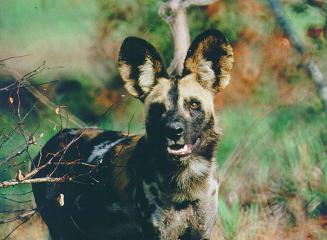

In [139]:
image

## Preprocessing des images

In [140]:

def preprocess_image(image_path, target_size=(224, 224)):
    # Chargement de l'image avec OpenCV
    img = cv2.imread(image_path)
    if img is None:
        print(f"Image non trouvée à {image_path}")
        return None

    # Conversion de l'image en RGB pour les traitements ultérieurs
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Étape 1 : Blanchiment (centrage) avec TensorFlow
    image = tf.image.convert_image_dtype(img, tf.float32)  # Convertit l'image en flottant [0, 1]
    image_whitened = tf.image.per_image_standardization(image)  # Applique le blanchiment

    # Conversion de l'image blanchie en tableau NumPy compatible avec OpenCV
    img_whitened_np = image_whitened.numpy()

    # Étape 2 : Égalisation de l'histogramme sur les niveaux de gris
    img_gray = cv2.cvtColor((img_whitened_np * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    img_equalized = cv2.equalizeHist(img_gray)

    # Étape 3 : Redimensionnement
    img_resized = cv2.resize(img_equalized, target_size)

    # Ajout de la dimension de canal (1 pour niveaux de gris ou 3 pour RGB)
    img_final = np.expand_dims(img_resized, axis=-1)  # (224, 224, 1)

    return img_final

In [141]:
df_file_list.shape

(20580, 3)

In [142]:
# Appliquer le prétraitement à chaque image
preprocessed_images = []
for path in df_file_list['Image Path']:
    full_path = os.path.join('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/', path)
    preprocessed_img = preprocess_image(full_path, target_size=(224, 224))
    if preprocessed_img is not None:
        preprocessed_images.append(preprocessed_img)
    else:
        print(f"Image non traitée : {full_path}")

# Optionnel : Affichage des informations
print("Prétraitement terminé pour toutes les images.")
df_file_list

Prétraitement terminé pour toutes les images.


Image Path  \
0               n02085620-Chihuahua/n02085620_10074.jpg   
1               n02085620-Chihuahua/n02085620_10131.jpg   
2               n02085620-Chihuahua/n02085620_10621.jpg   
3                n02085620-Chihuahua/n02085620_1073.jpg   
4               n02085620-Chihuahua/n02085620_10976.jpg   
...                                                 ...   
20575  n02116738-African_hunting_dog/n02116738_9798.jpg   
20576  n02116738-African_hunting_dog/n02116738_9818.jpg   
20577  n02116738-African_hunting_dog/n02116738_9829.jpg   
20578  n02116738-African_hunting_dog/n02116738_9844.jpg   
20579  n02116738-African_hunting_dog/n02116738_9924.jpg   

                                         Annotation  Label  
0               n02085620-Chihuahua/n02085620_10074      1  
1               n02085620-Chihuahua/n02085620_10131      1  
2               n02085620-Chihuahua/n02085620_10621      1  
3                n02085620-Chihuahua/n02085620_1073      1  
4               n02085620-Chihuahua/n02085620_10976      1  
...                                             ...    ...  
20575  n02116738-African_hunting_dog/n02116738_9798    120  
20576  n02116738-African_hunting_dog/n02116738_9818    120  
20577  n02116738-African_hunting_dog/n02116738_9829    120  
20578  n02116738-African_hunting_dog/n02116738_9844    120  
20579  n02116738-African_hunting_dog/n02116738_9924    120  

[20580 rows x 3 columns]

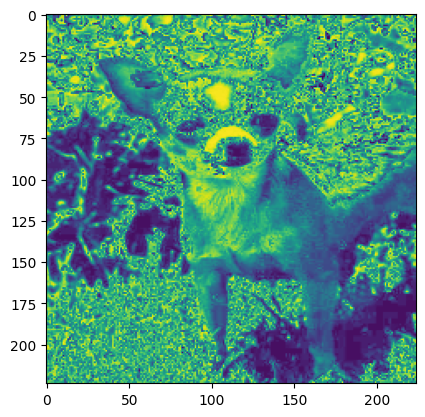

In [143]:
plt.imshow(preprocessed_images[1])

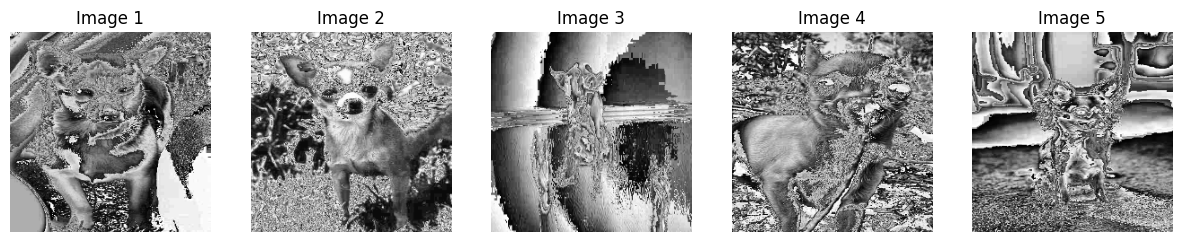

In [144]:
# Affichage des 5 premières images prétraitées
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(preprocessed_images[i], cmap='gray')  # Utilisez cmap='gray' si les images sont en niveaux de gris
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()


## Construction du réseau CNN sans data augmentation

Je ne prends que 3 classes:
- Maltese_dog : classe 3
- Afghan_hound : classe 10
- Scottish_deerhound : classe 27

In [145]:
# Filtrer pour ne garder que les lignes avec les labels 3, 10, ou 27
filtered_df = df_file_list[df_file_list['Label'].isin([3, 10, 27])]

filtered_df.shape

(723, 3)

In [146]:
filtered_df.head()

Image Path  \
337  n02085936-Maltese_dog/n02085936_10073.jpg   
338  n02085936-Maltese_dog/n02085936_10130.jpg   
339  n02085936-Maltese_dog/n02085936_10148.jpg   
340  n02085936-Maltese_dog/n02085936_10197.jpg   
341  n02085936-Maltese_dog/n02085936_10199.jpg   

                                Annotation  Label  
337  n02085936-Maltese_dog/n02085936_10073      3  
338  n02085936-Maltese_dog/n02085936_10130      3  
339  n02085936-Maltese_dog/n02085936_10148      3  
340  n02085936-Maltese_dog/n02085936_10197      3  
341  n02085936-Maltese_dog/n02085936_10199      3

In [147]:
df_by_label = filtered_df.groupby('Label').head(1)
# Afficher les chemins des images et les annotations pour les labels filtrés
for index, row in df_by_label.iterrows():
    print(f"Image Path: {row['Image Path']}, Annotation (Label): {row['Label']}")

Image Path: n02085936-Maltese_dog/n02085936_10073.jpg, Annotation (Label): 3
Image Path: n02088094-Afghan_hound/n02088094_1003.jpg, Annotation (Label): 10
Image Path: n02092002-Scottish_deerhound/n02092002_10060.jpg, Annotation (Label): 27


In [148]:
labels = df_by_label['Label'].unique().tolist()
labels

[3, 10, 27]

In [149]:
# Appliquer le prétraitement à chaque image
preprocessed_images = []
for path in filtered_df['Image Path']:
    full_path = os.path.join('/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/', path)
    preprocessed_img = preprocess_image(full_path, target_size=(224, 224))
    if preprocessed_img is not None:
        preprocessed_images.append(preprocessed_img)
    else:
        print(f"Image non traitée : {full_path}")

# Optionnel : Affichage des informations
print("Prétraitement terminé pour toutes les images.")
filtered_df.head()

Prétraitement terminé pour toutes les images.


Image Path  \
337  n02085936-Maltese_dog/n02085936_10073.jpg   
338  n02085936-Maltese_dog/n02085936_10130.jpg   
339  n02085936-Maltese_dog/n02085936_10148.jpg   
340  n02085936-Maltese_dog/n02085936_10197.jpg   
341  n02085936-Maltese_dog/n02085936_10199.jpg   

                                Annotation  Label  
337  n02085936-Maltese_dog/n02085936_10073      3  
338  n02085936-Maltese_dog/n02085936_10130      3  
339  n02085936-Maltese_dog/n02085936_10148      3  
340  n02085936-Maltese_dog/n02085936_10197      3  
341  n02085936-Maltese_dog/n02085936_10199      3

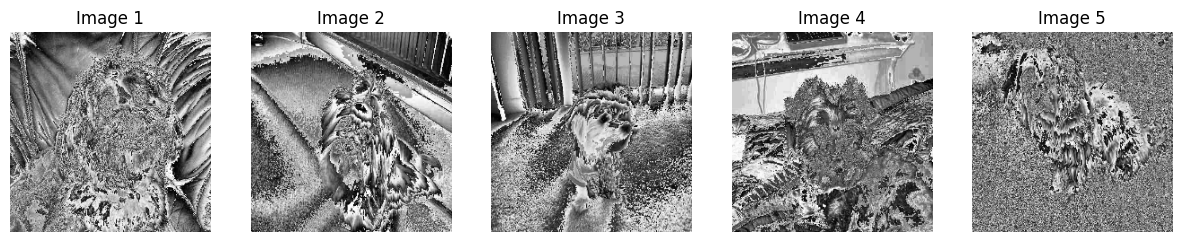

In [150]:
# Affichage des 5 premières images prétraitées
plt.figure(figsize=(15, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(preprocessed_images[i], cmap='gray')  # Utilisez cmap='gray' si les images sont en niveaux de gris
    plt.title(f"Image {i+1}")
    plt.axis('off')

plt.show()

### Séparation du jeu de données

In [151]:
batch_size = 32
img_height = 180
img_width = 180

In [152]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 723 files belonging to 3 classes.
Using 579 files for training.


In [153]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/Images/Images_selectionnees_2/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 723 files belonging to 3 classes.
Using 144 files for validation.


In [154]:
class_names = train_ds.class_names
print(class_names)

['n02085936-Maltese_dog', 'n02088094-Afghan_hound', 'n02092002-Scottish_deerhound']


In [155]:
# Comme le jeu de données d'origine ne contient pas de jeu de test, en créer un. 
# Pour ce faire, déterminer le nombre de lots de données disponibles dans l'ensemble de validation à l'aide tf.data.experimental.cardinality , 
# puis déplacer 25 % d'entre eux vers un ensemble de test.
val_batches = tf.data.experimental.cardinality(val_ds)
test_dataset = val_ds.take(val_batches // 4)
validation_dataset = val_ds.skip(val_batches // 4)

In [156]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 5
Number of test batches: 1


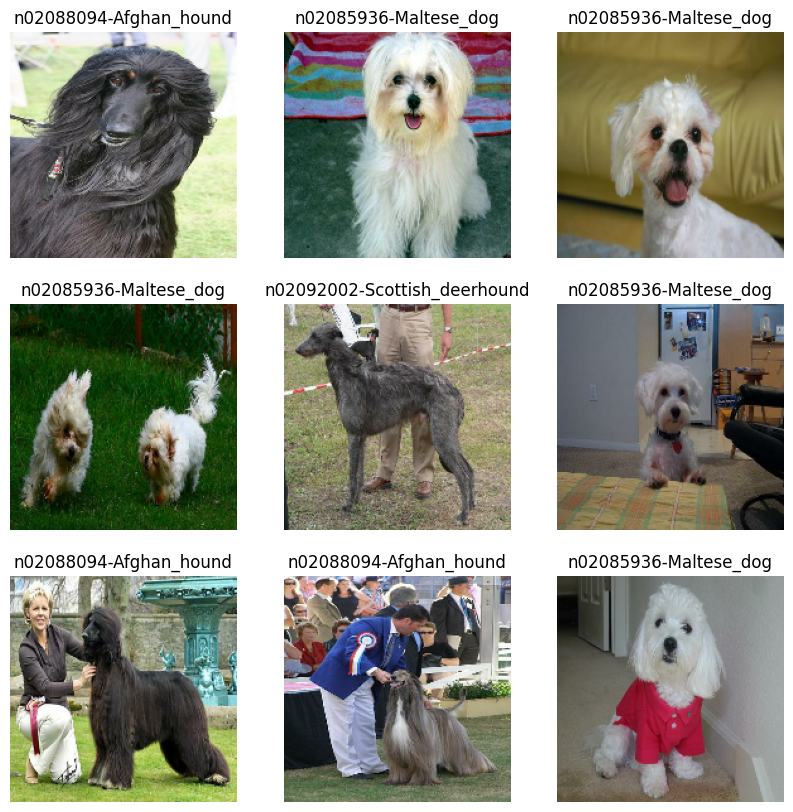

In [157]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [158]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [159]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

### Standardisation des données

Les valeurs des canaux RVB sont dans la plage [0, 255]. En général, nous devrions avoir des valeurs d'entrée petites pour le réseau neuronal.

Donc nous normalisons les valeurs pour qu'elles soient dans la plage [0, 1].

In [160]:
normalization_layer = layers.Rescaling(1./255)

In [161]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Création du modèle

Le modèle séquentiel se compose de trois blocs de convolution ( tf.keras.layers.Conv2D ) avec une couche de regroupement maximum ( tf.keras.layers.MaxPooling2D ) dans chacun d'eux. Il y a une couche entièrement connectée ( tf.keras.layers.Dense ) avec 128 unités dessus qui est activée par une fonction d'activation ReLU ( 'relu' ).

In [162]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),  #1ère couche
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),  #2ème couche
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),  #3ème couche
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P6/envp6/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compilation du modèle

Nous choisissons l'optimiseur tf.keras.optimizers.Adam et la fonction de perte tf.keras.losses.SparseCategoricalCrossentropy. Pour afficher la précision de la formation et de la validation pour chaque époque de formation, nous transmettons l'argument metrics à Model.compile .

In [163]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Résumé du modèle

Affichage de toutes les couches du réseau à l'aide de la méthode Model.summary du modèle.

In [164]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Formation du modèle

In [165]:
epochs=10

start_time_fit = time.time() # en secondesepochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time_fit = (time.time() - start_time_fit)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.3672 - loss: 1.4546 - val_accuracy: 0.2917 - val_loss: 1.0967
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.4639 - loss: 1.0770 - val_accuracy: 0.4583 - val_loss: 0.9890
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.5819 - loss: 0.8804 - val_accuracy: 0.5694 - val_loss: 0.8348
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.6591 - loss: 0.6919 - val_accuracy: 0.5139 - val_loss: 1.0162
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.6928 - loss: 0.6551 - val_accuracy: 0.6875 - val_loss: 0.6804
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.7858 - loss: 0.5302 - val_accuracy: 0.7153 - val_loss: 0.6820
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.7894 - loss: 0.4948 - val_accuracy: 0.7014 - val_loss: 0.7047
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.8738 - loss: 0.3769 - val_accuracy: 0.

### Visualisation des résultats d'entraînement

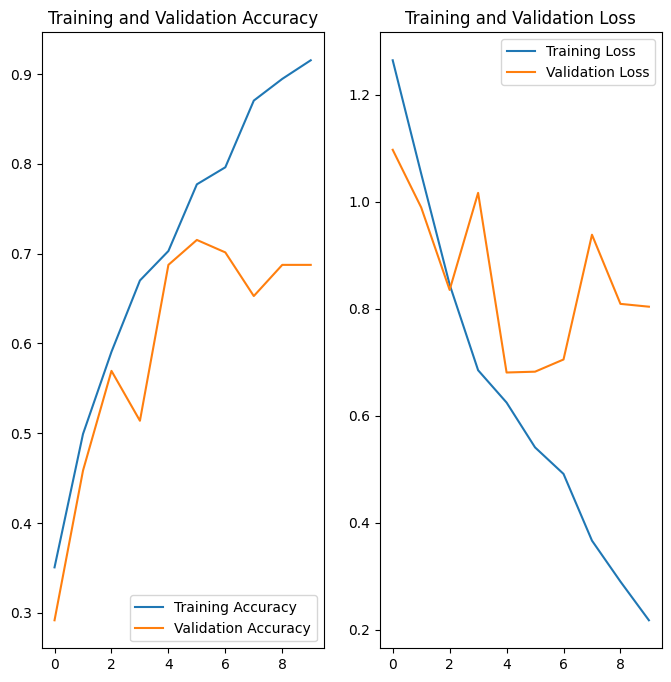

In [166]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Il y a une différence notable entre les scores de précision de l'entraînement du modèle qui atteignent les 90% et ceux de la validation qui atteignent maximum les 70%. Le modèle n'apprend pas bien à cause du petit nombre des données et  n'arrive pas à généraliser sur de nouveaux exemples.

### Évaluation et prédiction

In [167]:
start_time_test = time.time() # en secondes
test_loss, test_accuracy = model.evaluate(test_dataset)
time_test = (time.time() - start_time_test)

print('Test accuracy :', test_accuracy)
print('Test loss :', test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5625 - loss: 1.0248
Test accuracy : 0.5625
Test loss : 1.0247925519943237


In [168]:
print("Temps d'entraînement:", time_fit)
print("Temps de test:", time_test)

Temps d'entraînement: 22.342111110687256
Temps de test: 0.050543785095214844


Les résultats de prédictions sur de nouveaux exemples confirment le surajustement, seulement 50% de précision sur le jeu de test. Nous allons donc palier le problème en générant de nouvelles données d'entraînement à partir de ceux existants en les augmentant à partir de transformations aléatoires qui produisent des images d'apparence crédible. Nous aurons ainsi plus de données à donner au modèle pour qu'il s'entraîne et arrive à mieux généraliser.

## Data Augmentation

Nous implémentons l'augmentation des données à l'aide des couches de prétraitement Keras suivantes : tf.keras.layers.RandomFlip , tf.keras.layers.RandomRotation et tf.keras.layers.RandomZoom.

In [169]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

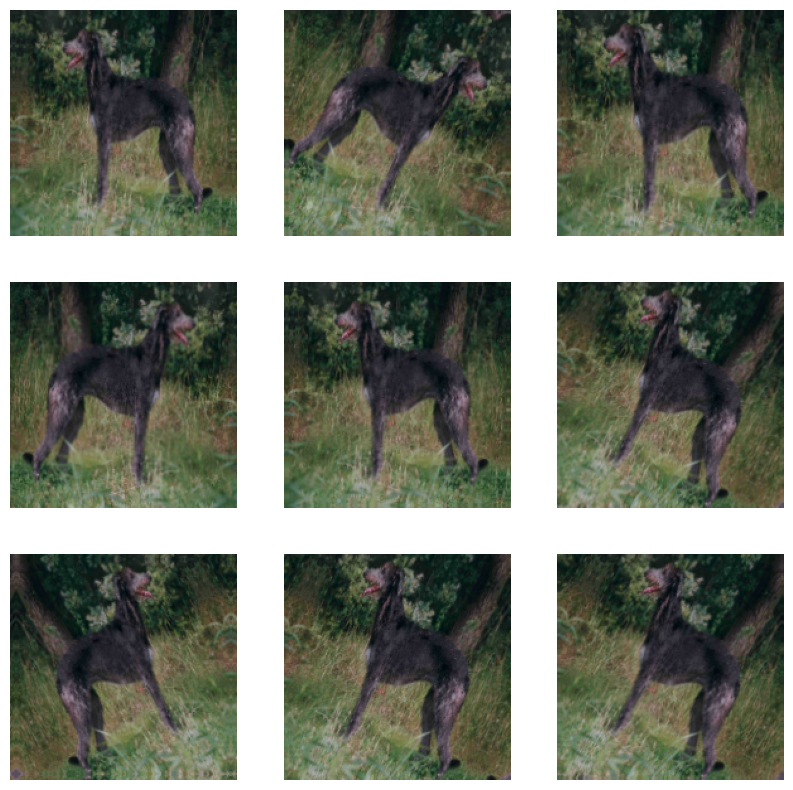

In [170]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Abandon

Une autre technique pour réduire le surajustement consiste à introduire une régularisation des abandons dans le réseau.

Lorsque nous appliquons une suppression à une couche, elle supprime de manière aléatoire (en définissant l'activation sur zéro) un certain nombre d'unités de sortie de la couche pendant le processus d'apprentissage. L'abandon prend un nombre fractionnaire comme valeur d'entrée, sous la forme de 0,1, 0,2, 0,4, etc. Cela signifie abandonner 10 %, 20 % ou 40 % des unités de sortie au hasard de la couche appliquée.


Créons un nouveau réseau de neurones avec tf.keras.layers.Dropout avant de l'entraîner à l'aide des images augmentées 

In [171]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiler et entraîner le modèle

In [172]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [173]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_10 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [174]:
epochs = 15

start_time_fit = time.time() # en secondesepochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
time_fit = (time.time() - start_time_fit)

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.4145 - loss: 1.3499 - val_accuracy: 0.3056 - val_loss: 1.1976
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.4778 - loss: 1.0107 - val_accuracy: 0.5069 - val_loss: 1.0193
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.5814 - loss: 0.9160 - val_accuracy: 0.5556 - val_loss: 0.8571
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.6310 - loss: 0.8657 - val_accuracy: 0.5972 - val_loss: 0.8754
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.5537 - loss: 0.8994 - val_accuracy: 0.5625 - val_loss: 0.9257
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.6346 - loss: 0.8192 - val_accuracy: 0.5833 - val_loss: 0.9083
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.6516 - loss: 0.7245 - val_accuracy: 0.6389 - val_loss: 0.7358
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.6945 - loss: 0.6998 - val_accuracy: 0.

### Visualisation des résultats d'entraînement

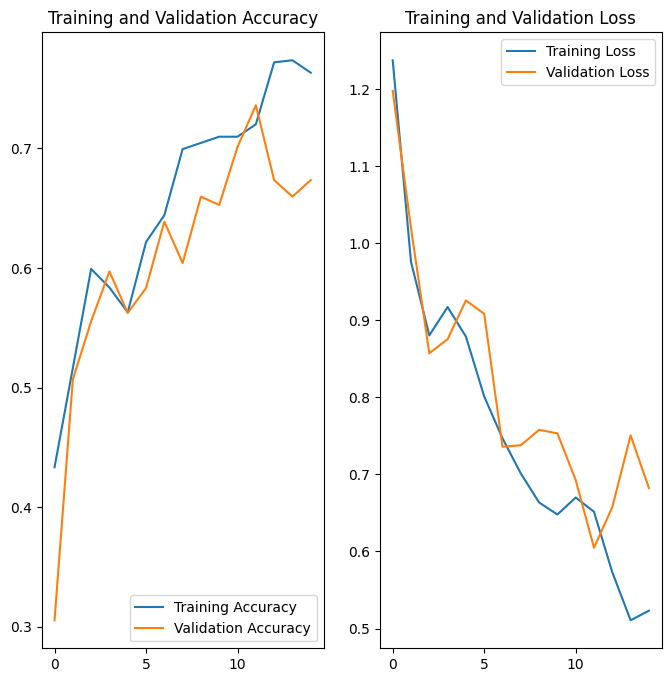

In [175]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Il y a moins de surajustement, les scores de précision sont plus rapprochés.

### Évaluation et prédiction

In [176]:
start_time_test = time.time() # en secondes
test_loss, test_accuracy = model.evaluate(test_dataset)
time_test = (time.time() - start_time_test)
print('Test accuracy :', test_accuracy)
print('Test loss :', test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5625 - loss: 0.9642
Test accuracy : 0.5625
Test loss : 0.9641669392585754


In [177]:
print("Temps d'entraînement:", time_fit)
print("Temps de test:", time_test)

Temps d'entraînement: 35.38348603248596
Temps de test: 0.08051776885986328


## Optimisation

### Nouvelle couche et régularisation Dropout

Ajout d'une nouvelle couche Conv2D et une régularisation Dropout ajustée

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),  # Ajout d'une nouvelle couche
    layers.MaxPooling2D(),
    layers.Dropout(0.3),  # Augmentation du Dropout de 0.2 à 0.3
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Activation softmax pour multi-classes
])

### Taux d'apprentissage ajouté

Ajout d'un optimiseur Adam avec un taux d'apprentissage spécifique

In [179]:
# Compilation avec un optimiseur et une fonction de perte ajustée
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [180]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_11 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     1,982,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,080,419 (7.94 MB)

 Trainable params: 2,080,419 (7.94 MB)

 Non-trainable params: 0 (0.00 B)

### Nombre d'épochs augmentés

Des hyperparamètres ajustés pour l'exécution : nombre d'epochs augmentés de 10 à 15


In [181]:

# Ajustement des hyperparamètres d'exécution
epochs = 15
start_time_fit = time.time() # en secondesepochs=10
history = model.fit(train_ds, validation_data=val_ds, batch_size=32, epochs=epochs)
time_fit = (time.time() - start_time_fit)

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.3021 - loss: 1.1061 - val_accuracy: 0.5972 - val_loss: 1.0566
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.4938 - loss: 1.0258 - val_accuracy: 0.4792 - val_loss: 0.9265
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.5879 - loss: 0.8610 - val_accuracy: 0.6319 - val_loss: 0.7470
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.6007 - loss: 0.7916 - val_accuracy: 0.5833 - val_loss: 0.7785
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.6515 - loss: 0.7278 - val_accuracy: 0.5833 - val_loss: 0.7676
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.7099 - loss: 0.6746 - val_accuracy: 0.6042 - val_loss: 0.6877
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.6408 - loss: 0.7170 - val_accuracy: 0.6389 - val_loss: 0.6693
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.6990 - loss: 0.6923 - val_accuracy: 0.

### Visualisation des résultats d'entraînement

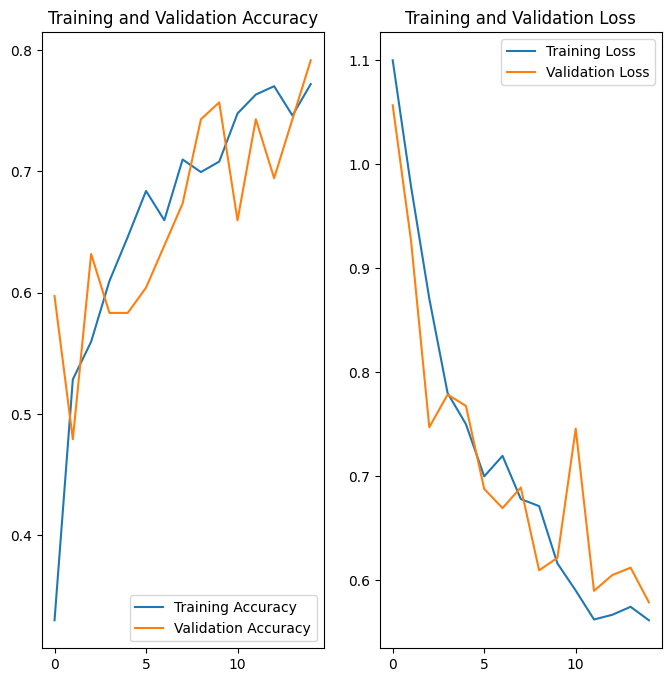

In [182]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Évaluation et prédiction

In [183]:
start_time_test = time.time() # en secondes
test_loss, test_accuracy = model.evaluate(test_dataset)
time_test = (time.time() - start_time_test)

print('Test accuracy :', test_accuracy)
print('Test loss :', test_loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6875 - loss: 0.7166
Test accuracy : 0.6875
Test loss : 0.7165546417236328


In [184]:
print("Temps d'entraînement:", time_fit)
print("Temps de test:", time_test)

Temps d'entraînement: 41.434515953063965
Temps de test: 0.03996014595031738


Probabilités par classe :
 [[0.2419188  0.4451968  0.31288442]
 [0.43465275 0.26996323 0.29538414]
 [0.23420902 0.39625922 0.36953178]
 [0.23421657 0.3590425  0.406741  ]
 [0.23277013 0.4011996  0.36603025]
 [0.23023963 0.45190516 0.31785518]
 [0.23647569 0.44938847 0.31413582]
 [0.23723558 0.46128163 0.3014828 ]
 [0.29971415 0.2696878  0.430598  ]
 [0.23030105 0.4522129  0.31748608]
 [0.3210093  0.39919695 0.27979362]
 [0.44676393 0.31873792 0.23449808]
 [0.22517349 0.51886946 0.25595713]
 [0.55890566 0.22078338 0.22031096]
 [0.22582799 0.2670991  0.5070728 ]
 [0.23266062 0.39659324 0.3707462 ]
 [0.39542404 0.3426693  0.26190662]
 [0.2975268  0.3618793  0.34059387]
 [0.23910871 0.29108667 0.4698046 ]
 [0.51577574 0.24199954 0.24222465]
 [0.23256776 0.36426362 0.40316865]
 [0.23280956 0.40577447 0.361416  ]
 [0.22831784 0.29498518 0.4766971 ]
 [0.5570388  0.21915247 0.22380887]
 [0.22073825 0.54802406 0.23123778]
 [0.24987504 0.47367296 0.276452  ]
 [0.23735541 0.5014002  0.26124445]
 

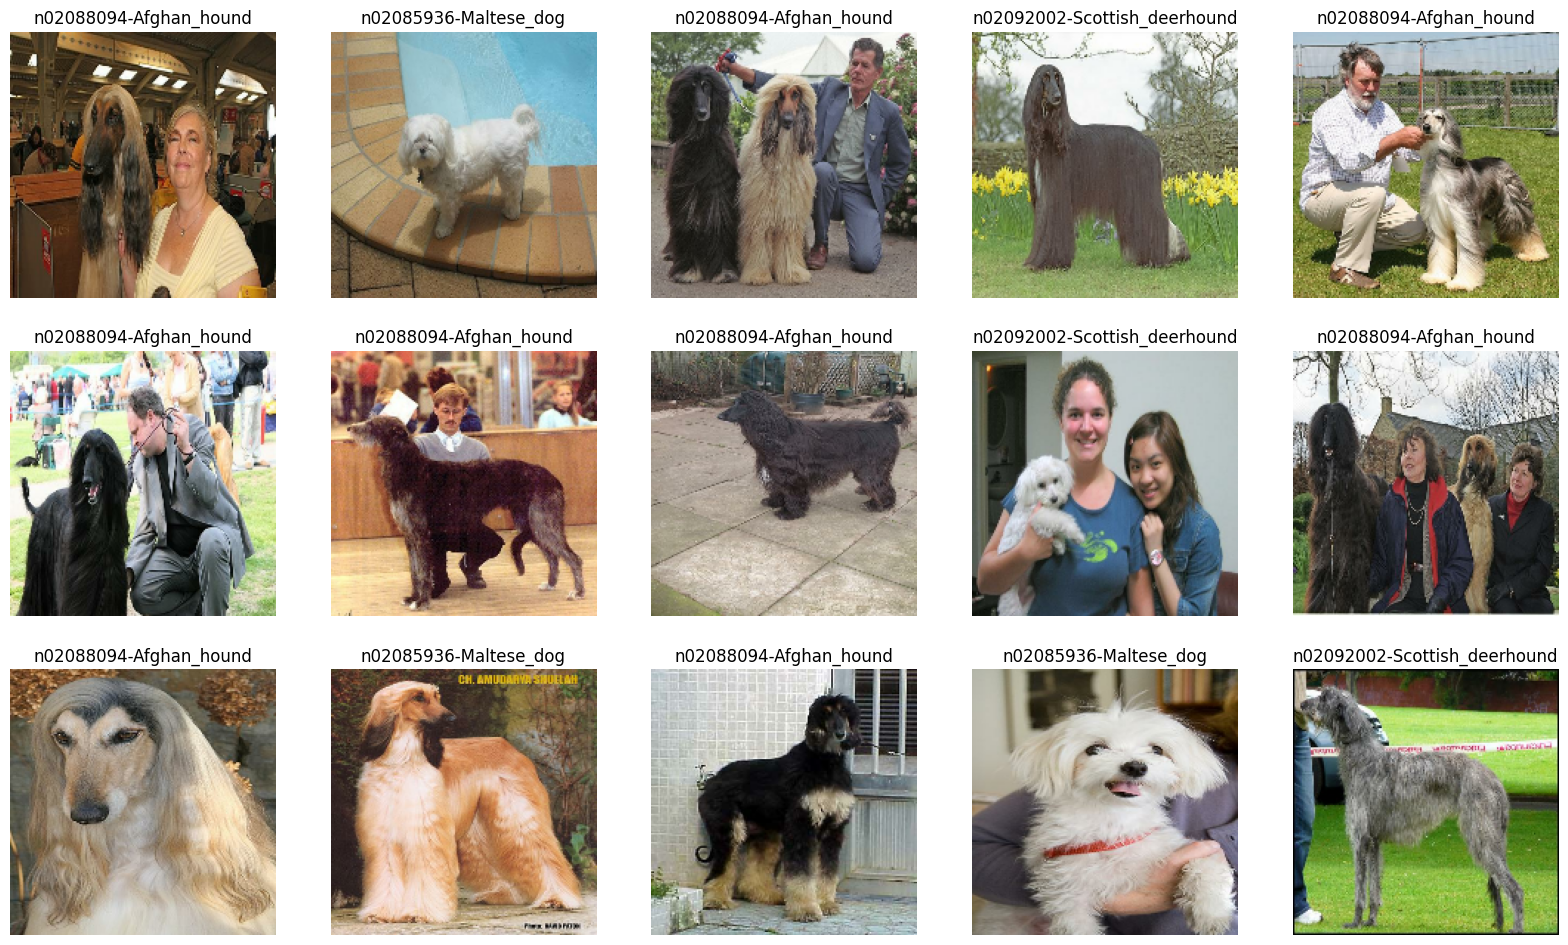

In [ ]:
# Récupérer un lot d'images du jeu de test
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
 
# Obtenir les prédictions brutes (logits) du modèle
logits = model.predict_on_batch(image_batch)

# Appliquer la fonction softmax pour convertir les logits en probabilités
probabilities = tf.nn.softmax(logits, axis=-1)

# Obtenir les classes prédites en sélectionnant l'indice avec la probabilité maximale
predicted_classes = tf.argmax(probabilities, axis=-1)

print('Probabilités par classe :\n', probabilities.numpy())
print('Classes prédites :\n', predicted_classes.numpy())
print('Labels réels :\n', label_batch)

# Affichage des images avec leur classe prédite
plt.figure(figsize=(20, 20))
for i in range(15):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    # Affiche le nom de la classe prédite
    plt.title(class_names[predicted_classes[i].numpy()])
    plt.axis("off")
plt.show()

In [186]:
model.save('dog_breed_cnn_3.h5') 